<a href="https://colab.research.google.com/github/ever07/smokingdata/blob/main/Limpieza%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Limpieza de Datos**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/ever07/smokingdata/refs/heads/main/smoking_data.csv')

In [25]:
#Un vistazo rápido a los datos
print(data.shape)
data.head()

(150, 12)


,Country,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Top Cigarette Brand in Country,Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%),Smoking Ban Policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,NaN


**Modificación de los nombres de las columnas**

In [26]:
new_columns = ['country', 'year', 'smokers', 'prevalence',
               'male_smokers', 'female_smokers', 'consumption',
               'brand', 'market_share', 'deaths',
               'tax_rate', 'ban_policy']

data.columns = new_columns
data.head()

,country,year,smokers,prevalence,male_smokers,female_smokers,consumption,brand,market_share,deaths,tax_rate,ban_policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,NaN


In [9]:
#Información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         150 non-null    object 
 1   year            150 non-null    int64  
 2   smokers         150 non-null    float64
 3   prevalence      150 non-null    float64
 4   male_smokers    150 non-null    float64
 5   female_smokers  150 non-null    float64
 6   consumption     150 non-null    float64
 7   brand           150 non-null    object 
 8   market_share    150 non-null    float64
 9   deaths          150 non-null    int64  
 10  tax_rate        150 non-null    float64
 11  ban_policy      102 non-null    object 
dtypes: float64(7), int64(2), object(3)
memory usage: 14.2+ KB


In [10]:
#No existen valores duplicados
data.duplicated().sum()

np.int64(0)

**Tratamiento de valores faltantes**  
La columna Smoking Ban Policy tiene un total de 48 valores que son tomados como nulos, por ser una cantidad considerable para el total de filas no se eliminaran si no que se imputara con un valor predeterminado

In [11]:
data.isnull().sum()

,0
country,0
year,0
smokers,0
prevalence,0
male_smokers,0
female_smokers,0
consumption,0
brand,0
market_share,0
deaths,0


In [14]:
data.fillna("ninguna", inplace=True)
data.isnull().sum()

,0
country,0
year,0
smokers,0
prevalence,0
male_smokers,0
female_smokers,0
consumption,0
brand,0
market_share,0
deaths,0


In [16]:
data.head()

,country,year,smokers,prevalence,male_smokers,female_smokers,consumption,brand,market_share,deaths,tax_rate,ban_policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,ninguna


**Información de las columnas numericas**

In [18]:
data.describe()

,year,smokers,prevalence,male_smokers,female_smokers,consumption,market_share,deaths,tax_rate
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2018.066667,170.466000,23.387333,17.719333,5.668000,927.815333,33.956667,224419.926667,57.835333
std,4.389840,100.806168,9.697494,8.204800,2.844335,773.890041,14.643969,160056.395740,17.996011
min,2010.000000,2.700000,5.900000,3.800000,0.900000,4.300000,10.100000,4452.000000,30.100000
25%,2014.000000,86.225000,15.600000,11.725000,3.400000,290.850000,20.550000,84614.750000,42.350000
50%,2018.000000,165.000000,22.800000,16.900000,5.000000,753.050000,33.300000,190765.500000,55.250000
75%,2022.000000,256.625000,31.000000,23.725000,7.500000,1358.475000,45.775000,349719.000000,75.000000
max,2024.000000,344.100000,39.900000,34.200000,15.200000,3238.600000,59.900000,606058.000000,89.800000


**Busqueda de valores atipicos en variables numericas**

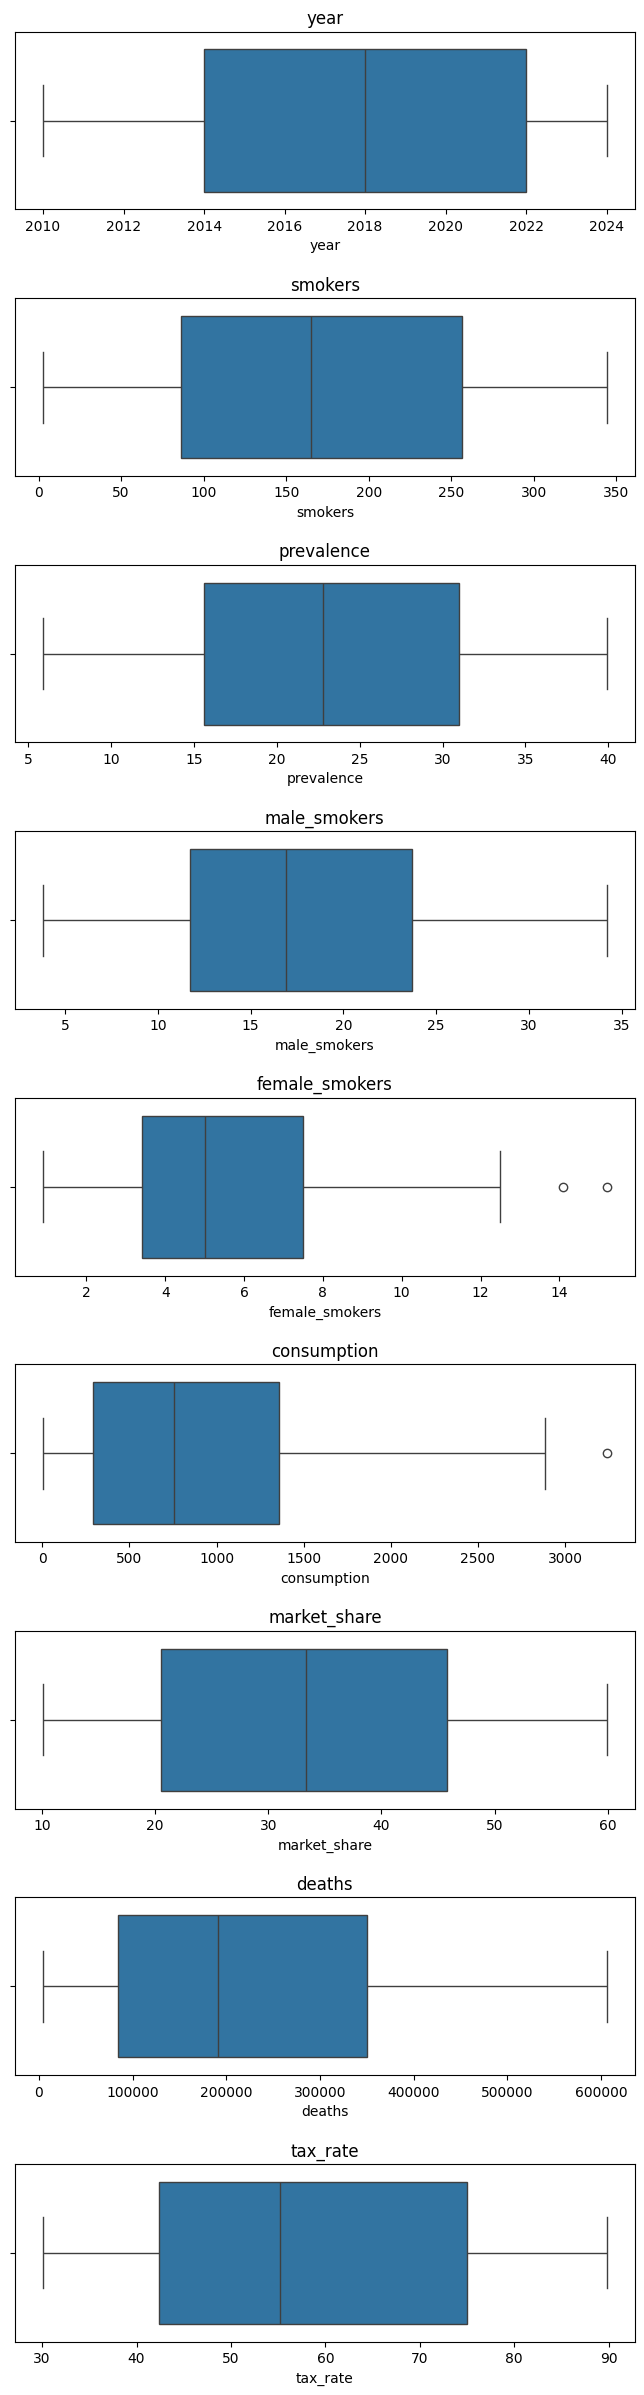

In [19]:
cols_num = ['year', 'smokers', 'prevalence', 'male_smokers',
            'female_smokers', 'consumption', 'market_share',
            'deaths', 'tax_rate']

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

**Busqueda de errores tipograficos en variables categoricas**  
como resultado podemos observar que todos los valores estan escritos correctamente,
no hay duplicados por mala escritura

In [20]:
#cols_cat = ['country', 'brand', 'ban_policy']

#fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))
#fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(cols_cat):
#   sns.countplot(x=col, data=data, ax=ax[i])
#  ax[i].set_title(col)
#  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

print(data['country'].unique())
print(data['brand'].unique())
print(data['ban_policy'].unique())

['South Africa' 'Germany' 'Brazil' 'South Korea' 'UK' 'Canada' 'Vietnam'
 'Italy' 'India' 'China' 'Mexico' 'Spain' 'Russia' 'Thailand' 'Australia'
 'Turkey' 'Japan' 'Indonesia' 'USA' 'France']
['Peter Stuyvesant' 'Marlboro' 'Derby' 'Esse' 'Du Maurier' 'Vinataba' 'MS'
 'Gold Flake' 'China National Tobacco Corp.' 'Fortuna' 'Sobranie' 'Wonder'
 'Winfield' 'Tekel' 'Mevius' 'Gudang Garam' 'Gauloises']
['Partial' 'Comprehensive' 'ninguna']


En conclusión el set de datos ha sido analizado para encontrar anomalías y este mismo ya se encuentra en condiciones para su analisis exploratorio.  
Se procede a exportarlo:

In [22]:
data.to_csv('smoking_data_clean.csv', index=False)